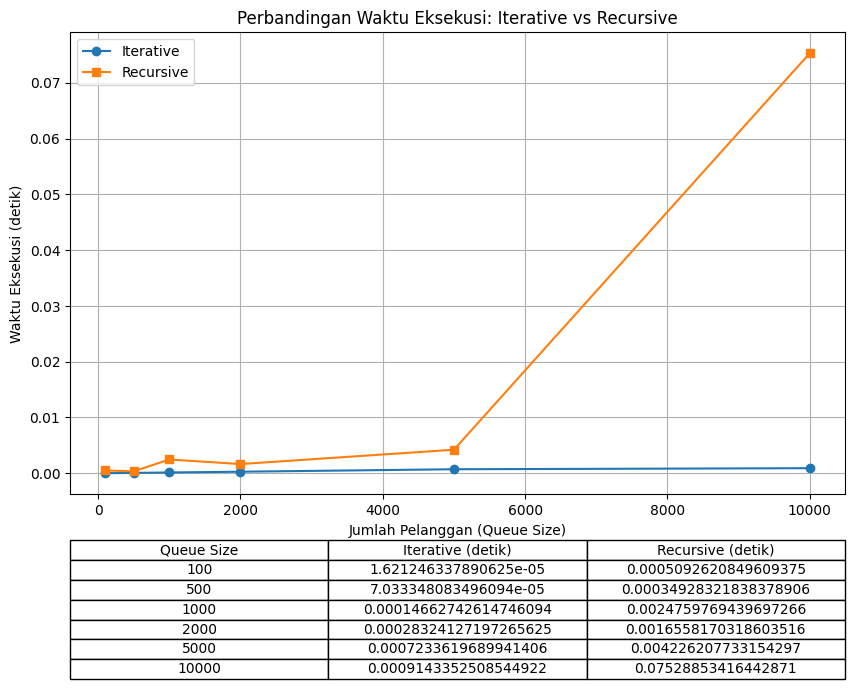

In [4]:
import time
import matplotlib.pyplot as plt
import random
import sys

# Fungsi untuk memproses pelanggan (simulasi waktu pelayanan)
def process_customer(customer_id):
    pass  # Simulasi tidak memproses apa pun, hanya mengukur waktu

# Algoritma FCFS - Iteratif
def fcfs_iterative(queue):
    for customer in queue:
        process_customer(customer)

# Algoritma FCFS - Rekursif
def fcfs_recursive(queue):
    if not queue:
        return
    process_customer(queue.pop(0))
    fcfs_recursive(queue)

# Fungsi untuk menghitung waktu eksekusi
def measure_time(func, queue):
    start_time = time.time()
    func(queue[:])  # Menggunakan salinan queue untuk mencegah modifikasi asli
    return time.time() - start_time

# Simulasi dengan berbagai ukuran antrian
queue_sizes = [100, 500, 1000, 2000, 5000, 10000]
iterative_times = []
recursive_times = []

# Increase the recursion limit
sys.setrecursionlimit(15000)  # Increased to a value larger than the largest queue size. Adjust if needed.

for size in queue_sizes:
    queue = list(range(size))  # Membuat antrian dengan jumlah pelanggan sesuai ukuran
    iterative_times.append(measure_time(fcfs_iterative, queue))
    recursive_times.append(measure_time(fcfs_recursive, queue))

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(queue_sizes, iterative_times, label="Iterative", marker='o')
plt.plot(queue_sizes, recursive_times, label="Recursive", marker='s')
plt.title("Perbandingan Waktu Eksekusi: Iterative vs Recursive")
plt.xlabel("Jumlah Pelanggan (Queue Size)")
plt.ylabel("Waktu Eksekusi (detik)")
plt.legend()
plt.grid(True)

# Menambahkan Tabel
cell_text = []
for i in range(len(queue_sizes)):
    cell_text.append([queue_sizes[i], iterative_times[i], recursive_times[i]])

plt.table(cellText=cell_text,
          colLabels=["Queue Size", "Iterative (detik)", "Recursive (detik)"],
          loc="bottom",
          cellLoc="center",
          bbox=[0.0, -0.4, 1.0, 0.3])  # Mengatur posisi tabel

plt.show()
